## Import Libraries

In [240]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean, std
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
%matplotlib inline

---
## DATASET

O Dataset de teino é constituido por 5000 casos e pelos seguintes atributos: 

* **city_name** - nome da cidade em causa;
* **record_date** - o timestamp associado ao registo;
* **magnitude_of_delay** - magnitude do atraso provocado pelos incidentes que se verificam no record_date correspondente;
* **delay_in_seconds** - atraso, em segundos, provocado pelos incidentes que se verificam no record_date correspondente;
* **affected_roads** - estradas afectadas pelos incidentes que se verificam no record_date correspondente;
* **luminosity** - o nível de luminosidade que se verificava na cidade de Guimarães;
* **avg_temperature** - valor médio da temperatura para o record_date na cidade de Guimarães;
* **avg_atm_pressure** - valor médio da pressão atmosférica para o record_date na cidade de Guimarães;
* **avg_humidity** - valor médio de humidade para o record_date na cidade de Guimarães;
* **avg_wind_speed** - valor médio da velocidade do vento para o record_date na cidade de Guimarães;
* **avg_precipitation** - valor médio de precipitação para o record_date na cidade de Guimarães;
* **avg_rain** - avaliação qualitativa do nível de precipitação para o record_date na cidade de Guimarães;
* **incidents** - indicação acerca do nível de incidentes rodoviários que se verificam no record_date correspondente na cidade de Guimarães.

---

## Get the Data

In [241]:
traffic = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [242]:
traffic.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [243]:
traffic.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 

In [244]:
print(traffic.isna().sum()) #Verifica missing values

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64


In [245]:
traffic.nunique() # Verifica quantos valores direnetes cada feature tem

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [246]:
traffic['magnitude_of_delay'].value_counts()

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64

In [247]:
traffic['affected_roads'].value_counts()

N101,N101,N101,N101,N101                                                                                                                                      1514
N101,N101,N101,N101,N101,                                                                                                                                     1078
,                                                                                                                                                              709
N101,N101                                                                                                                                                      149
N101,N101,N101,N101,N101,N101                                                                                                                                  114
                                                                                                                                                              ... 
N101,N101,N105,N105,N1

In [248]:
traffic['record_date'].value_counts()

2021-03-15 23:00    1
2021-10-29 07:00    1
2021-04-25 03:00    1
2021-03-17 17:00    1
2021-07-22 00:00    1
                   ..
2021-10-19 00:00    1
2021-10-22 23:00    1
2021-12-04 23:00    1
2021-09-13 23:00    1
2021-12-20 02:00    1
Name: record_date, Length: 5000, dtype: int64

In [249]:
traffic['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

In [250]:
traffic['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

In [251]:
traffic['incidents'].value_counts()

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64

In [252]:
print(traffic.duplicated().sum()) # Verifica se há valores duplicados

0


## Data Visualisation

In [253]:
sns.set_theme(palette="flare")

<AxesSubplot: >

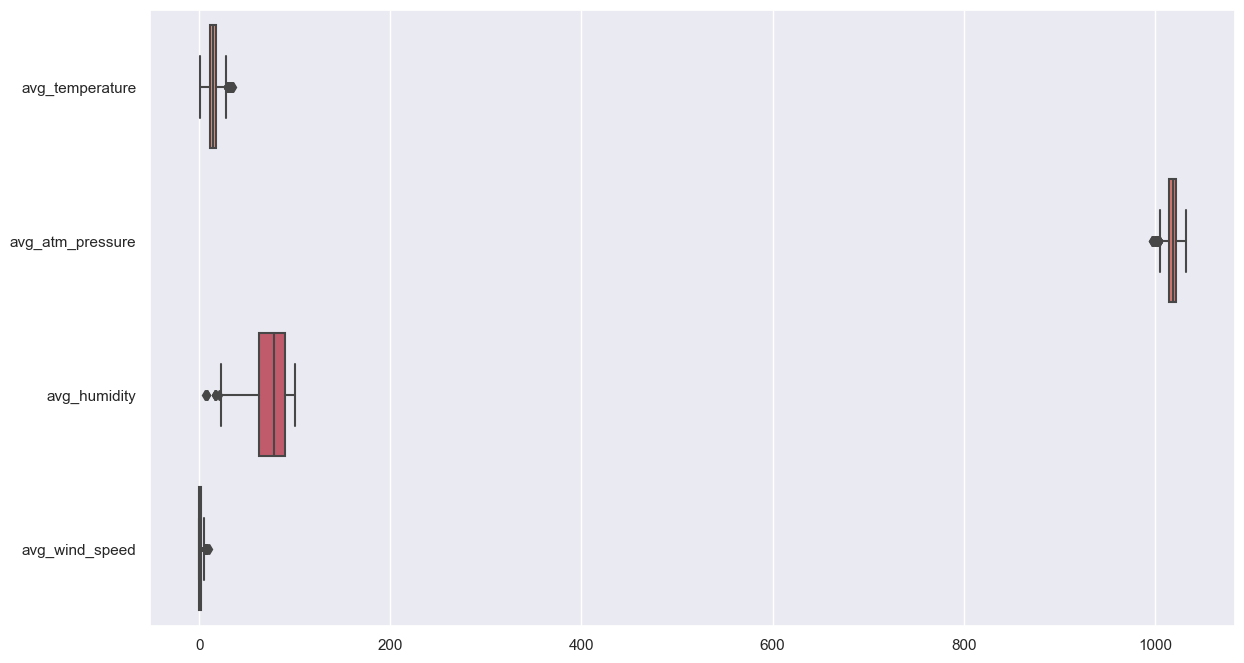

In [254]:
traffic_aux = traffic.drop(['city_name','record_date','magnitude_of_delay','affected_roads', 'luminosity', 'avg_rain', 'incidents', 'delay_in_seconds', 'avg_precipitation'], axis=1)
plt.subplots(figsize=(14,8))
sns.boxplot(data=traffic_aux, orient="h")

<AxesSubplot: >

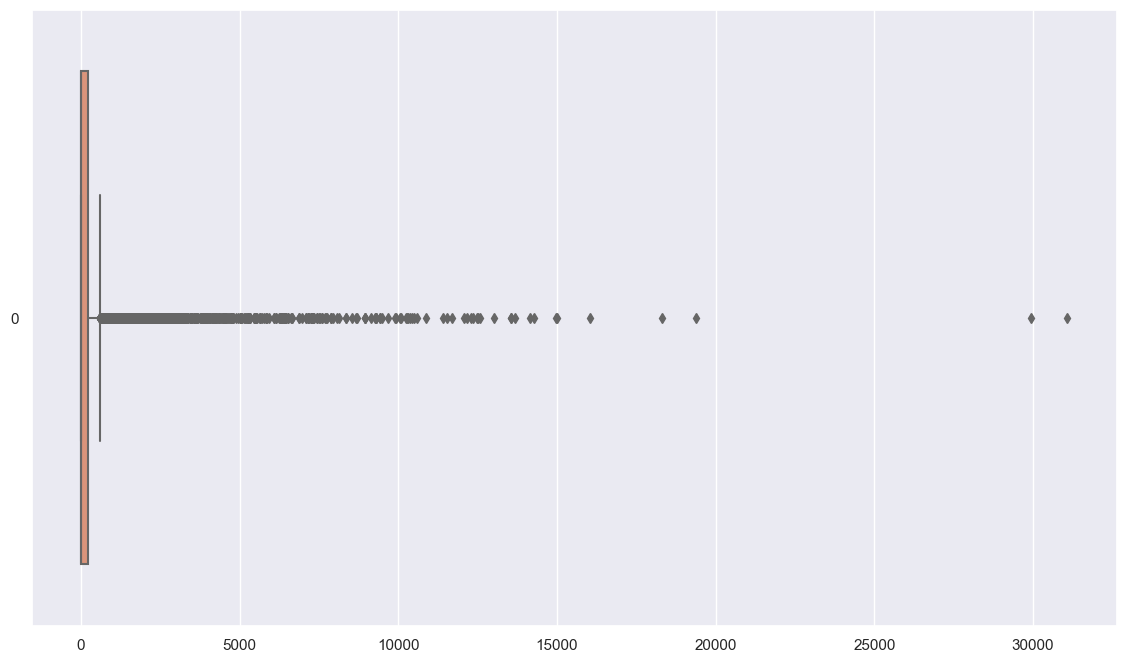

In [255]:
plt.subplots(figsize=(14,8))
sns.boxplot(data=traffic['delay_in_seconds'], orient="h")

<AxesSubplot: xlabel='incidents', ylabel='Count'>

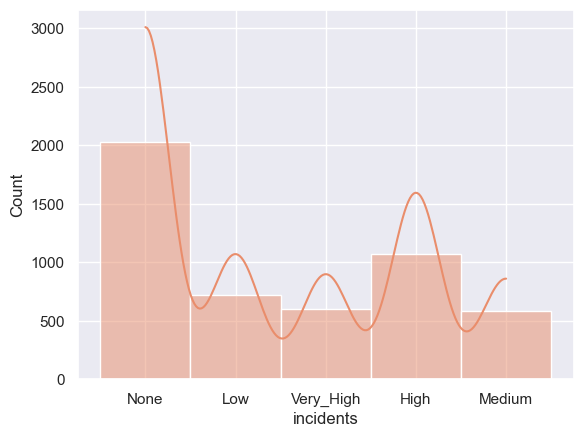

In [256]:
sns.histplot(traffic['incidents'],kde=True)

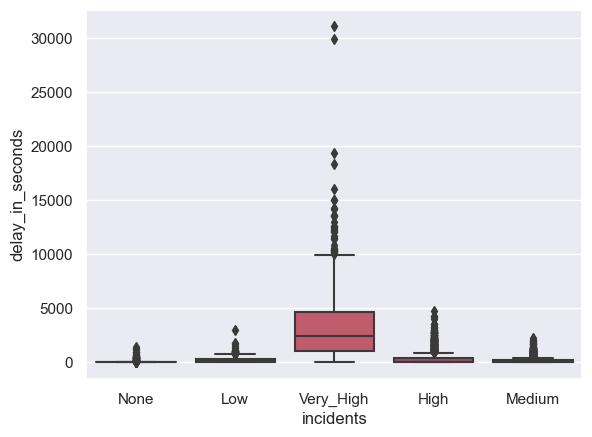

In [257]:
ax = sns.boxplot(x=traffic["incidents"], y=traffic["delay_in_seconds"])

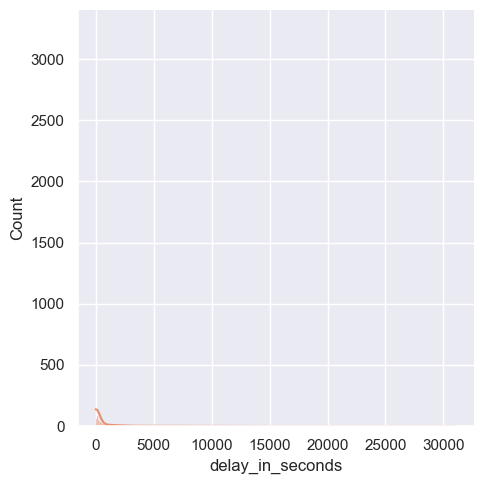

In [258]:
sns.displot(data=traffic, x="delay_in_seconds", kde=True)

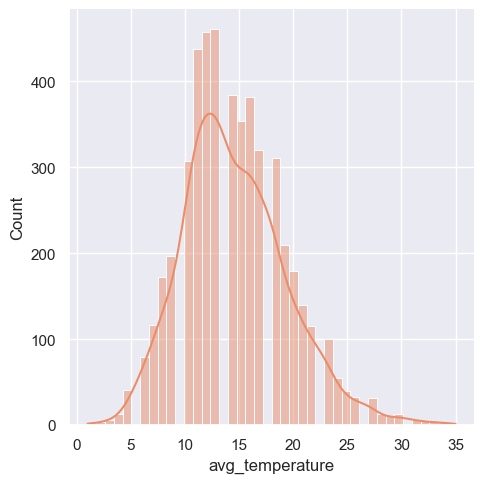

In [259]:
sns.displot(data=traffic, x="avg_temperature", kde=True)

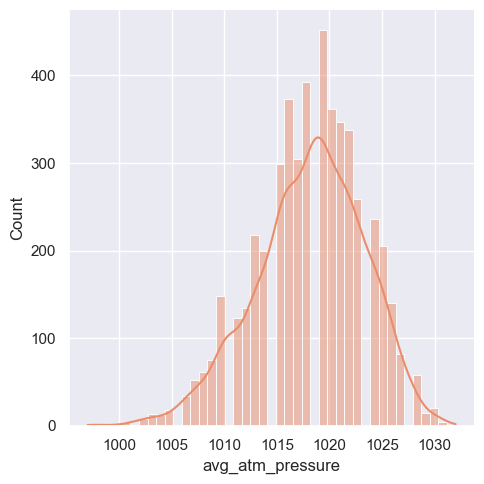

In [260]:
sns.displot(data=traffic, x="avg_atm_pressure", kde=True)

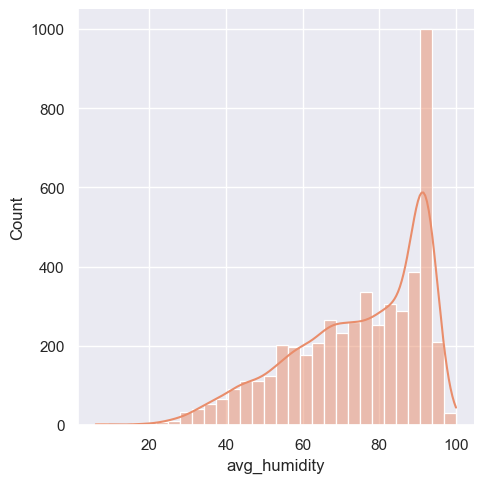

In [261]:
sns.displot(data=traffic, x="avg_humidity", kde=True)

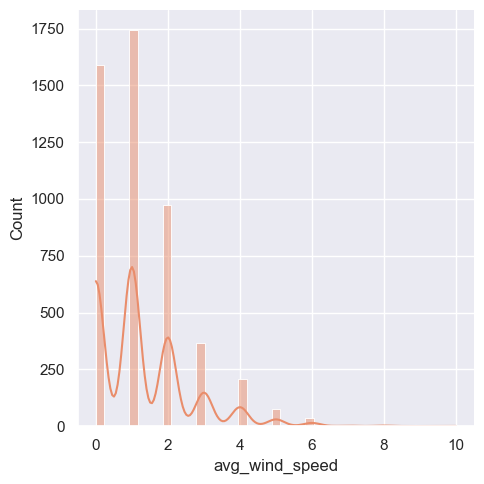

In [262]:
sns.displot(data=traffic, x="avg_wind_speed", kde=True)

/tmp/ipykernel_178832/2543372313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')


<AxesSubplot: >

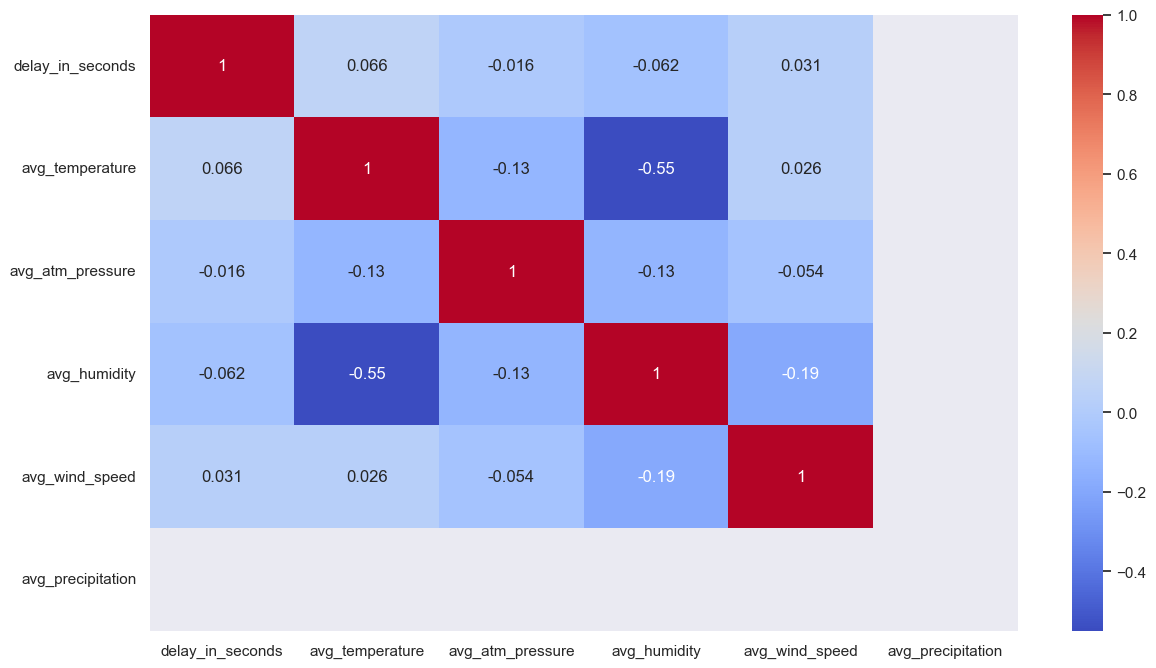

In [263]:
plt.subplots(figsize=(14,8))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

## Data Preparation

   
### Drop redundant columns

   * O *city_name* pode ser eliminado visto que é sempre Gimarães
   * O *avg_precipitation* também pode ser eliminado já que é sempre 0.
   * O *avg_humidity* tem uma correlação forte com a *avg_temperature*, e por isso era redundante para o modelo de previsão.

In [29]:
# DROP
traffic.drop(['city_name'], axis=1, inplace=True)
traffic.drop(['avg_precipitation'], axis=1, inplace=True)
traffic.drop(['avg_humidity'], axis=1, inplace=True)

test.drop(['city_name'], axis=1, inplace=True)
test.drop(['avg_precipitation'], axis=1, inplace=True)
test.drop(['avg_humidity'], axis=1, inplace=True)

### Handling missing data

In [270]:
traffic.drop(['record_date'], axis=1, inplace=True)
test.drop(['affected_roads'], axis=1, inplace=True)

N101                                      4014
N101,N105                                  586
R206,N101,N105                              79
N206,N101,N105                              36
R206,N101                                   31
IC5,N101                                    31
N105                                        31
N309,N101,N105                              29
N206,R206,N101,N105                         23
R206,N309,N101,N105                         18
IC5,N101,N105                               12
N206,N101                                   12
R206                                        10
N206,N309,N101,N105                          8
N309,N101                                    8
IC5,N309,R206,N105,N206,N101                 6
IC5,N309,N101,N105                           5
EM579,N101                                   5
IC5,N309,N105,N206,N101                      5
N309,R206,N105,N206,N101                     4
N309,R206,N105,N310,N101                     4
N309,R206,N10

In [181]:
traffic.isna().sum()

city_name             0
magnitude_of_delay    0
delay_in_seconds      0
affected_roads        0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_precipitation     0
avg_rain              0
incidents             0
dtype: int64

### Handling categoric data


* O *incidents* devemos passar para o tipo int(None=0, Low=1, Medium=2,High=3, Very High=4)
* A *luminosity* pode ser passada para o tipo int(Dark=0, Low Light=1, Light=2)
* O *magnitude_of_delay* também passa para int(UNDEFINED=0, MAJOR=1, MODERATE=2)
* Da mesma forma o *avg_rain* passa para int(Sem Chuva=0, chuva fraca=1, chuva moderada=2, chuva forte =3)

In [31]:
#tratamento de incidents, luminosity, affected_roads, magnitude_of_delay
traffic["incidents"] = traffic['incidents'].replace({'None' : 0, 'Low' : 1, 'Medium' : 2, 'High' : 3, 'Very_High' : 4}).astype(int)
traffic["luminosity"] = traffic['luminosity'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)
traffic["avg_rain"] = traffic['avg_rain'].replace({'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}).astype(int)
traffic["magnitude_of_delay"] = traffic['magnitude_of_delay'].replace({'UNDEFINED' : 0, 'MAJOR' : 1, 'MODERATE' : 2}).astype(int)

test["luminosity"] = test['luminosity'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)
test["avg_rain"] = test['avg_rain'].replace({'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}).astype(int)
test["magnitude_of_delay"] = test['magnitude_of_delay'].replace({'UNDEFINED' : 0, 'MAJOR' : 1, 'MODERATE' : 2}).astype(int)

traffic.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents
0,0,0,2021-03-15 23:00,0,12.0,1013.0,1.0,0,0
1,0,385,2021-12-25 18:00,0,12.0,1007.0,1.0,0,0
2,0,69,2021-03-12 15:00,2,14.0,1025.0,0.0,0,1
3,1,2297,2021-09-29 09:00,2,15.0,1028.0,1.0,0,4
4,0,0,2021-06-13 11:00,2,27.0,1020.0,1.0,0,3


### Creating features

* O *record_date* pode ser dividido em 3 colunas (hora, dia da semana e mês).
    + O dia da semana é posteriormente transformando em números entre 1-7
* O ano é irrelevante já que é sempre 2021.

In [32]:
#transformação da data para datetime
traffic.record_date = pd.to_datetime(traffic.record_date)

test.record_date = pd.to_datetime(test.record_date)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  1206 non-null   int64         
 1   delay_in_seconds    1206 non-null   int64         
 2   record_date         1206 non-null   datetime64[ns]
 3   luminosity          1206 non-null   int64         
 4   avg_temperature     1206 non-null   float64       
 5   avg_atm_pressure    1206 non-null   float64       
 6   avg_wind_speed      1206 non-null   float64       
 7   avg_rain            1206 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 75.5 KB


In [33]:
#divisão da coluna record_date em 3 colunas diferentes
traffic['Month'] = traffic.record_date.dt.month
traffic['Hour'] = traffic.record_date.dt.hour
traffic['Day'] = traffic.record_date.dt.day_name()
traffic['Day'] = traffic['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
traffic = traffic.drop(['record_date'], axis=1)

test['Month'] = test.record_date.dt.month
test['Hour'] = test.record_date.dt.hour
test['Day'] = test.record_date.dt.day_name()
test['Day'] = test['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
test = test.drop(['record_date'], axis=1)

traffic.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,Month,Hour,Day
0,0,0,0,12.0,1013.0,1.0,0,0,3,23,2
1,0,385,0,12.0,1007.0,1.0,0,0,12,18,7
2,0,69,2,14.0,1025.0,0.0,0,1,3,15,6
3,1,2297,2,15.0,1028.0,1.0,0,4,9,9,4
4,0,0,2,27.0,1020.0,1.0,0,3,6,11,1


### Handling Outliers

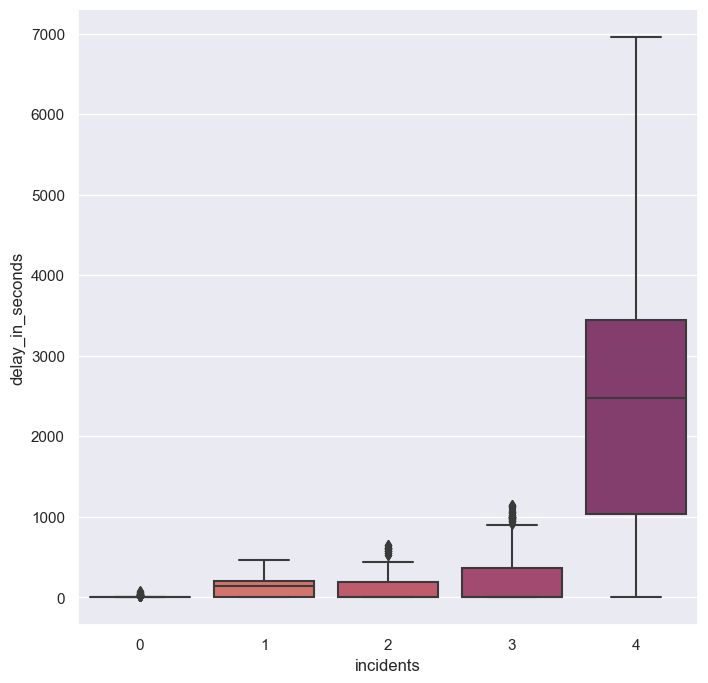

In [34]:
# substitui os outliers pela média
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 1*std
    group[outliers] = mean        # or "group[~outliers].mean()"
    return group

traffic['delay_in_seconds'] = traffic.groupby('incidents')['delay_in_seconds'].transform(replace)
plt.subplots(figsize=(8,8))
ax = sns.boxplot(x=traffic["incidents"], y=traffic["delay_in_seconds"])

### Handeling Normalization os Data

* normalização dos dados numéricos para que estes fiquem entre 0 e 1
* utilizar o get_dummies para obter os dados categóricos dividios entre colunas.

In [35]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
traffic[['delay_in_seconds']] = min_max_scaler.fit_transform(traffic[['delay_in_seconds']])
traffic[['avg_temperature']] = min_max_scaler.fit_transform(traffic[['avg_temperature']])
traffic[['avg_atm_pressure']] = min_max_scaler.fit_transform(traffic[['avg_atm_pressure']])
traffic['avg_wind_speed'] = min_max_scaler.fit_transform(traffic[['avg_wind_speed']])
traffic[["Hour"]] = min_max_scaler.fit_transform(traffic[["Hour"]])
traffic[["Month"]] = min_max_scaler.fit_transform(traffic[["Month"]])

test[['delay_in_seconds']] = min_max_scaler.fit_transform(test[['delay_in_seconds']])
test[['avg_temperature']] = min_max_scaler.fit_transform(test[['avg_temperature']])
test[['avg_atm_pressure']] = min_max_scaler.fit_transform(test[['avg_atm_pressure']])
test['avg_wind_speed'] = min_max_scaler.fit_transform(test[['avg_wind_speed']])
test[["Hour"]] = min_max_scaler.fit_transform(test[["Hour"]])
test[["Month"]] = min_max_scaler.fit_transform(test[["Month"]])

In [36]:
traffic_aux = traffic.drop(['incidents'], axis=1)
traffic_aux = pd.get_dummies(traffic_aux, drop_first = True)
traffic = pd.concat([traffic['incidents'], traffic_aux], axis=1)

test = pd.get_dummies(test, drop_first = True)

<AxesSubplot: >

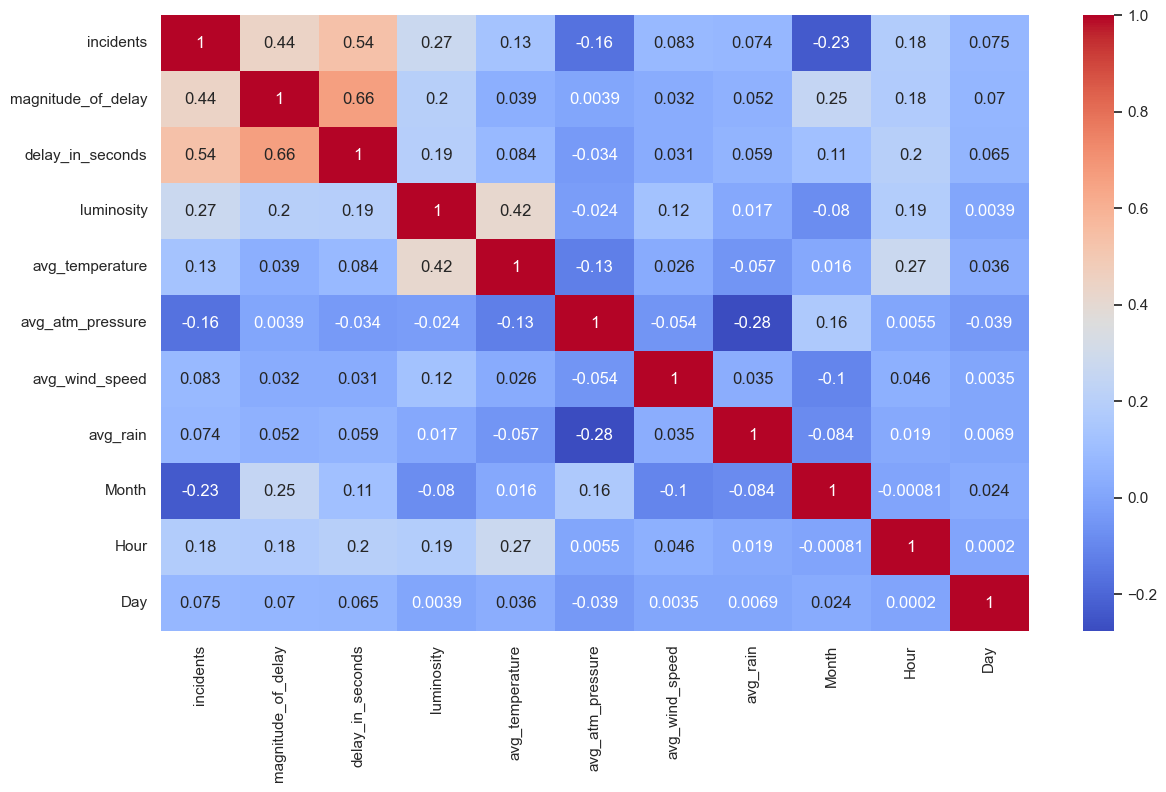

In [37]:
plt.subplots(figsize=(14,8))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

In [38]:
test

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,Month,Hour,Day
0,0,0.081461,2,0.464286,0.59375,0.000000,0,0.272727,0.826087,3
1,0,0.000000,0,0.500000,0.59375,0.222222,0,0.818182,0.173913,4
2,0,0.000000,2,0.714286,0.56250,0.000000,0,0.545455,0.826087,1
3,0,0.009417,2,0.571429,0.28125,0.333333,0,0.818182,0.652174,7
4,0,0.000000,2,0.642857,0.71875,0.000000,0,0.818182,0.434783,2
...,...,...,...,...,...,...,...,...,...,...
1201,0,0.000000,2,0.357143,0.81250,0.222222,0,1.000000,0.434783,6
1202,0,0.002960,0,0.785714,0.53125,0.222222,0,0.545455,0.000000,6
1203,1,0.084824,2,0.392857,0.59375,0.000000,0,1.000000,0.652174,1
1204,0,0.016548,2,0.464286,0.50000,0.111111,0,0.181818,0.739130,2


## Model Training

In [39]:
#divisão do target
x = traffic.drop(['incidents'], axis=1) # input features - everything except the incidents feature
y = traffic['incidents']                # target feature - incidents

x

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,Month,Hour,Day
0,0,0.000000,0,0.323529,0.457143,0.1,0,0.181818,1.000000,2
1,0,0.001484,0,0.323529,0.285714,0.1,0,1.000000,0.782609,7
2,0,0.009919,2,0.382353,0.800000,0.0,0,0.181818,0.652174,6
3,1,0.330219,2,0.411765,0.885714,0.1,0,0.727273,0.391304,4
4,0,0.000000,2,0.764706,0.657143,0.1,0,0.454545,0.478261,1
...,...,...,...,...,...,...,...,...,...,...
4995,0,0.000000,0,0.352941,0.685714,0.0,0,0.272727,0.000000,3
4996,0,0.000000,2,0.529412,0.571429,0.0,0,0.545455,0.608696,3
4997,0,0.000000,0,0.352941,0.742857,0.2,0,0.181818,0.130435,5
4998,0,0.000000,0,0.323529,0.485714,0.2,0,0.909091,0.260870,3


In [43]:
y

0       0
1       0
2       1
3       4
4       3
       ..
4995    3
4996    0
4997    0
4998    0
4999    0
Name: incidents, Length: 5000, dtype: int64

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2411, random_state=2022)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 3419 to 922
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  1206 non-null   int64  
 1   delay_in_seconds    1206 non-null   float64
 2   luminosity          1206 non-null   int64  
 3   avg_temperature     1206 non-null   float64
 4   avg_atm_pressure    1206 non-null   float64
 5   avg_wind_speed      1206 non-null   float64
 6   avg_rain            1206 non-null   int64  
 7   Month               1206 non-null   float64
 8   Hour                1206 non-null   float64
 9   Day                 1206 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 103.6 KB


### DecisionTree

In [41]:
#criação de uma arvore de decião 73%
print("**DecisionTreeClassifier**")
clf_Tree = DecisionTreeClassifier(random_state=2022)
clf_Tree.fit(x,y)

print("Test Data...")
predictions_Tree = clf_Tree.predict(test)
print(predictions_Tree)

#k cross val
print("Training Data...")
scores = cross_val_score(clf_Tree,x,y,cv = 10)
print("Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

**DecisionTreeClassifier**
Test Data...
[3 0 0 ... 3 1 3]
Training Data...
Cross Validation Accuracy: 0.8954 (+/- 0.0276)


### RandomForest

In [42]:
#criação de uma arvore de decisão 84,7%
print("**RandomForestClassifier**")
clf_Forest = RandomForestClassifier(n_estimators=100, random_state=2022)
clf_Forest.fit(x,y)

print("Test Data...")
predictions_Forest = clf_Forest.predict(test)
print(predictions_Forest)

print("Training Data...")
scores = cross_val_score(clf_Forest,x,y,cv = 10)
print("Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

**RandomForestClassifier**
Test Data...
[3 0 0 ... 3 1 3]
Training Data...
Cross Validation Accuracy: 0.8956 (+/- 0.0300)


In [43]:
#criação de uma arvore de decisão 84,7%
print("**RandomForestClassifier**")
clf_Forest2 = RandomForestClassifier(n_estimators=500, random_state=2022, criterion='entropy')
clf_Forest2.fit(x,y)

print("Test Data...")
predictions_Forest2 = clf_Forest2.predict(test)
print(predictions_Forest2)

print("Training Data...")
scores = cross_val_score(clf_Forest2,x,y,cv = 10)
print("Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

**RandomForestClassifier**
Test Data...
[3 0 0 ... 3 1 3]
Training Data...
Cross Validation Accuracy: 0.8986 (+/- 0.0308)


### BaggingClassifier

In [44]:
print("**BaggingClassifier**")
clf_BG = BaggingClassifier(KNeighborsClassifier(), random_state=2022, max_samples=0.5, max_features=0.5)
clf_BG.fit(x,y)

print("Test Data...")
predictions_BG = clf_BG.predict(test)
print(predictions_BG)

#k cross val
print("Training Data...")
scores = cross_val_score(clf_BG,x,y,cv = 10)
print("Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

**BaggingClassifier**
Test Data...
[4 0 0 ... 3 0 3]
Training Data...
Cross Validation Accuracy: 0.6988 (+/- 0.0274)


### AdaBoostClassifier

In [46]:
print("**AdaBoostClassifier**")
base = RandomForestClassifier(n_estimators=100, random_state=2022, criterion='entropy')
clf_Booster = AdaBoostClassifier(n_estimators=100, random_state=2022, base_estimator=base)
clf_Booster.fit(x,y)

print("Test Data...")
predictions_Booster = clf_Booster.predict(test)
print(predictions_Booster)

#k cross val
print("Training Data...")
scores = cross_val_score(clf_Booster,x,y,cv = 10)
print("Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

**AdaBoostClassifier**
Test Data...
[3 0 0 ... 3 1 3]
Training Data...
Cross Validation Accuracy: 0.8534 (+/- 0.0416)


Saving the results in CSV file

In [48]:
# acrescentar headers
submission = pd.DataFrame(predictions_Forest2, columns = ["Incidents"])
submission.insert(0, "RowId", range(1,1207), True)
submission.nunique()

#transformação dos valores para formato escrito
submission['Incidents']= submission['Incidents'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})
submission.info()

#passagem para ficheiro csv
submission.to_csv('submission.csv', index=False)

#submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RowId      1206 non-null   int64 
 1   Incidents  1206 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.0+ KB
